In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Train Sample


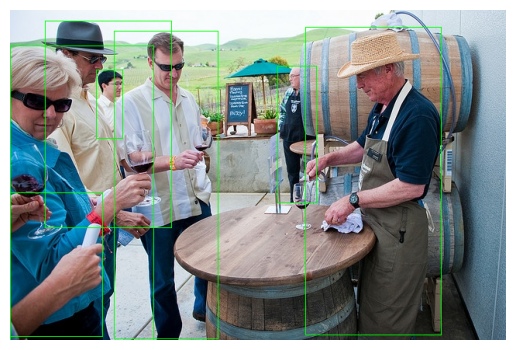

/kaggle/input/sampled-coco2017-person-dataset/Dataset_person/train/images/000000000308.jpg
Count: 7 persons


In [3]:
def predict_show(img_path, predictions, prob=None):
    img = cv2.imread(img_path) 

    h, w, _ = img.shape

    num = 0
    for i, pt in enumerate(predictions):
        num += 1
        x = float(pt[0])*w
        y = float(pt[1])*h
        width = float(pt[2])*w
        height = float(pt[3])*h
        x0 = x - width / 2
        x1 = x + width / 2
        y0 = y - height / 2
        y1 = y + height / 2

        start_point = (int(x0), int(y0))
        end_point = (int(x1), int(y1))
        img = cv2.rectangle(img, start_point, end_point, color=(0,255,0), thickness=1)
        
        if prob:
            cv2.putText(
            img,
            f"id:{int(prob[i][0])} conf:{prob[i][1]:.2f}",
            (int(x0), int(y0) - 10),
            fontFace = cv2.FONT_HERSHEY_SIMPLEX,
            fontScale = 0.3,
            color = (255, 255, 255),
            thickness=1
        )

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img)
    plt.show()
    print(f"{str(img_path)}")
    person = "persons" if num>1 else "person"
    print(f"Count: {num} {person}")

print("Train Sample")
img_path = '/kaggle/input/sampled-coco2017-person-dataset/Dataset_person/train/images/000000000308.jpg'
lbl_path = '/kaggle/input/sampled-coco2017-person-dataset/Dataset_person/train/labels/000000000308.txt'
with open(lbl_path, 'r') as input_file:
    lines = input_file.readlines()
    predictions = []
    for i, line in enumerate(lines):
        parts = line.strip().split()
        predictions.append(parts[1:5])
predict_show(img_path, predictions)

In [4]:
!pip install ultralytics -q
import os
from ultralytics import YOLO
!wandb disabled

W&B disabled.


In [5]:
model = YOLO("yolov8s.pt")
img_path = "/kaggle/input/sampled-coco2017-person-dataset/Dataset_person/validation/images/000000001000.jpg"
results = model.predict(img_path)

100%|██████████| 21.5M/21.5M [00:00<00:00, 169MB/s]



image 1/1 /kaggle/input/sampled-coco2017-person-dataset/Dataset_person/validation/images/000000001000.jpg: 480x640 13 persons, 1 handbag, 2 tennis rackets, 65.9ms
Speed: 5.8ms preprocess, 65.9ms inference, 234.7ms postprocess per image at shape (1, 3, 480, 640)


In [6]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
# print(boxes)
bb_box = []
prob = []
for box in boxes:
    label = box.cls.cpu().numpy()
    bb = box.xywhn.cpu().numpy()
    conf = box.conf.cpu().numpy()
    if label[0]==0:
        prob.append([label[0], conf[0]])
        bb_box.append([bb[0][0], bb[0][1], bb[0][2], bb[0][3]])

Pretrained prediction sample


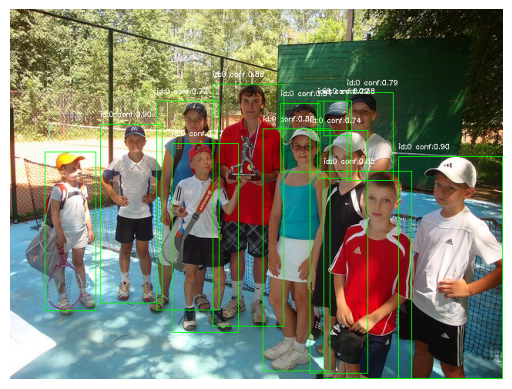

/kaggle/input/sampled-coco2017-person-dataset/Dataset_person/validation/images/000000001000.jpg
Count: 13 persons


In [7]:
print("Pretrained prediction sample")
predict_show(img_path, bb_box, prob=prob)

In [113]:
results = model.train(data="/kaggle/input/datamodel-yolo-person-detection/DataModel/data.yaml", epochs=30, imgsz=640, amp=False)

Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/datamodel-yolo-person-detection/DataModel/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

train: Scanning /kaggle/input/sampled-coco2017-person-dataset/Dataset_person/train/labels... 5432 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5432/5432 [00:05<00:00, 1039.71it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/sampled-coco2017-person-dataset/Dataset_person/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/sampled-coco2017-person-dataset/Dataset_person/validation/labels... 1072 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1072/1072 [00:01<00:00, 821.53it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/sampled-coco2017-person-dataset/Dataset_person/validation is not writeable, cache not saved.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.89G      1.234      1.085       1.27         42        640: 100%|██████████| 340/340 [01:48<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.43it/s]

                   all       1072       4401      0.723      0.564      0.663      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      7.88G      1.211      1.068      1.253         57        640: 100%|██████████| 340/340 [01:45<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.55it/s]


                   all       1072       4401      0.723      0.577      0.659      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.08G      1.214      1.073      1.257         31        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]


                   all       1072       4401      0.656      0.547      0.611      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      7.87G      1.227      1.077      1.258         55        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1072       4401      0.694      0.551      0.625       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.08G      1.263       1.12      1.286         76        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1072       4401       0.72      0.572      0.656      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.87G      1.244      1.102      1.277         54        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.53it/s]

                   all       1072       4401      0.719      0.586      0.664      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.06G      1.217      1.071      1.262         30        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1072       4401      0.724      0.593      0.677      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       8.1G      1.197      1.041      1.244         66        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.55it/s]

                   all       1072       4401       0.73      0.595      0.679      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.06G      1.191      1.039       1.24         48        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.41it/s]

                   all       1072       4401      0.756       0.58      0.674      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.07G      1.178      1.011      1.229         62        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]

                   all       1072       4401      0.738      0.607      0.688      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.87G      1.169     0.9988      1.222         84        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.52it/s]

                   all       1072       4401       0.77      0.597      0.691      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.08G      1.153      0.975       1.21         57        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1072       4401      0.747      0.615        0.7      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.87G      1.138     0.9655      1.206         72        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]

                   all       1072       4401      0.739      0.623      0.703       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.06G       1.12     0.9436      1.192         75        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.48it/s]

                   all       1072       4401      0.769      0.616      0.708      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       8.1G      1.103     0.9279      1.185         45        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1072       4401      0.758      0.619      0.709      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.07G        1.1     0.9062      1.179         58        640: 100%|██████████| 340/340 [01:45<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1072       4401      0.772      0.634      0.721      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.07G      1.078      0.896      1.166         31        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1072       4401      0.763      0.622      0.714      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.07G      1.069     0.8706      1.157         83        640: 100%|██████████| 340/340 [01:44<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.50it/s]

                   all       1072       4401      0.772      0.629      0.723       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.08G      1.048     0.8601      1.153         66        640: 100%|██████████| 340/340 [01:45<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.47it/s]

                   all       1072       4401      0.772      0.636      0.727      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       7.9G      1.054     0.8587      1.157         63        640: 100%|██████████| 340/340 [01:45<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.42it/s]

                   all       1072       4401      0.798      0.638      0.733      0.489


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.09G      1.009     0.7846      1.112         56        640: 100%|██████████| 340/340 [01:46<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.56it/s]

                   all       1072       4401      0.792      0.627      0.735      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.09G     0.9958     0.7594      1.109         19        640: 100%|██████████| 340/340 [01:44<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.56it/s]

                   all       1072       4401      0.789      0.635       0.73      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      8.09G      0.988     0.7424      1.097         21        640: 100%|██████████| 340/340 [01:44<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.45it/s]

                   all       1072       4401      0.777      0.648      0.739      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.06G     0.9701     0.7186      1.087         31        640: 100%|██████████| 340/340 [01:44<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.55it/s]

                   all       1072       4401      0.795      0.642      0.742      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      8.09G     0.9603     0.7055      1.079         27        640: 100%|██████████| 340/340 [01:44<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]

                   all       1072       4401      0.812      0.633      0.744      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.09G     0.9507     0.6841      1.068         45        640: 100%|██████████| 340/340 [01:44<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.46it/s]

                   all       1072       4401      0.784      0.639      0.741      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      8.09G     0.9319     0.6683      1.057         41        640: 100%|██████████| 340/340 [01:44<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.41it/s]

                   all       1072       4401      0.771      0.657      0.744      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.09G     0.9186     0.6481       1.05         30        640: 100%|██████████| 340/340 [01:44<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]

                   all       1072       4401      0.787      0.648      0.744      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      8.09G     0.9115     0.6397      1.046         21        640: 100%|██████████| 340/340 [01:44<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.54it/s]

                   all       1072       4401       0.78      0.655      0.747      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.09G      0.904     0.6273      1.039         32        640: 100%|██████████| 340/340 [01:44<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]

                   all       1072       4401      0.795      0.644      0.748      0.504



30 epochs completed in 0.955 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  2.83it/s]


                   all       1072       4401      0.795      0.644      0.748      0.504
Speed: 0.1ms preprocess, 3.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train2


In [114]:
!pip install zip_files
!zip-folder --auto-root --outfile /kaggle/working/run.zip /kaggle/working

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [8]:
model = YOLO("/kaggle/input/yolov8-person-detection-result/run/runs/detect/train2/weights/best.pt")
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics YOLOv8.2.60 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]
val: Scanning /kaggle/input/sampled-coco2017-person-dataset/Dataset_person/validation/labels... 1072 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1072/1072 [00:05<00:00, 197.53it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/sampled-coco2017-person-dataset/Dataset_person/validation is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:14<00:00,  4.72it/s]


                   all       1072       4401      0.797      0.646      0.748      0.504
Speed: 0.2ms preprocess, 6.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val


array([    0.50438])


image 1/1 /kaggle/input/sampled-coco2017-person-dataset/Dataset_person/validation/images/000000001000.jpg: 480x640 12 persons, 9.1ms
Speed: 2.3ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Pretrained prediction sample


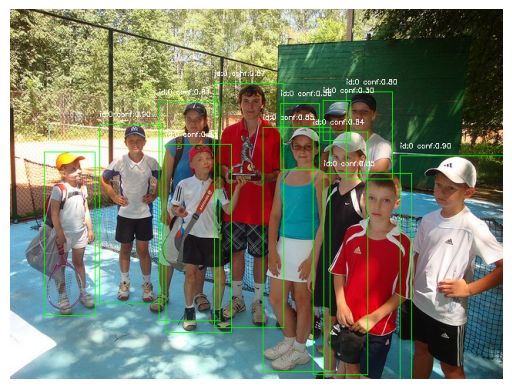

/kaggle/input/sampled-coco2017-person-dataset/Dataset_person/validation/images/000000001000.jpg
Count: 12 persons


In [10]:
img_path = "/kaggle/input/sampled-coco2017-person-dataset/Dataset_person/validation/images/000000001000.jpg"
results = model.predict(img_path)

for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
# print(boxes)
bb_box = []
prob = []
for box in boxes:
    label = box.cls.cpu().numpy()
    bb = box.xywhn.cpu().numpy()
    conf = box.conf.cpu().numpy()
    if label[0]==0:
        prob.append([label[0], conf[0]])
        bb_box.append([bb[0][0], bb[0][1], bb[0][2], bb[0][3]])
        
print("Pretrained prediction sample")
predict_show(img_path, bb_box, prob=prob)

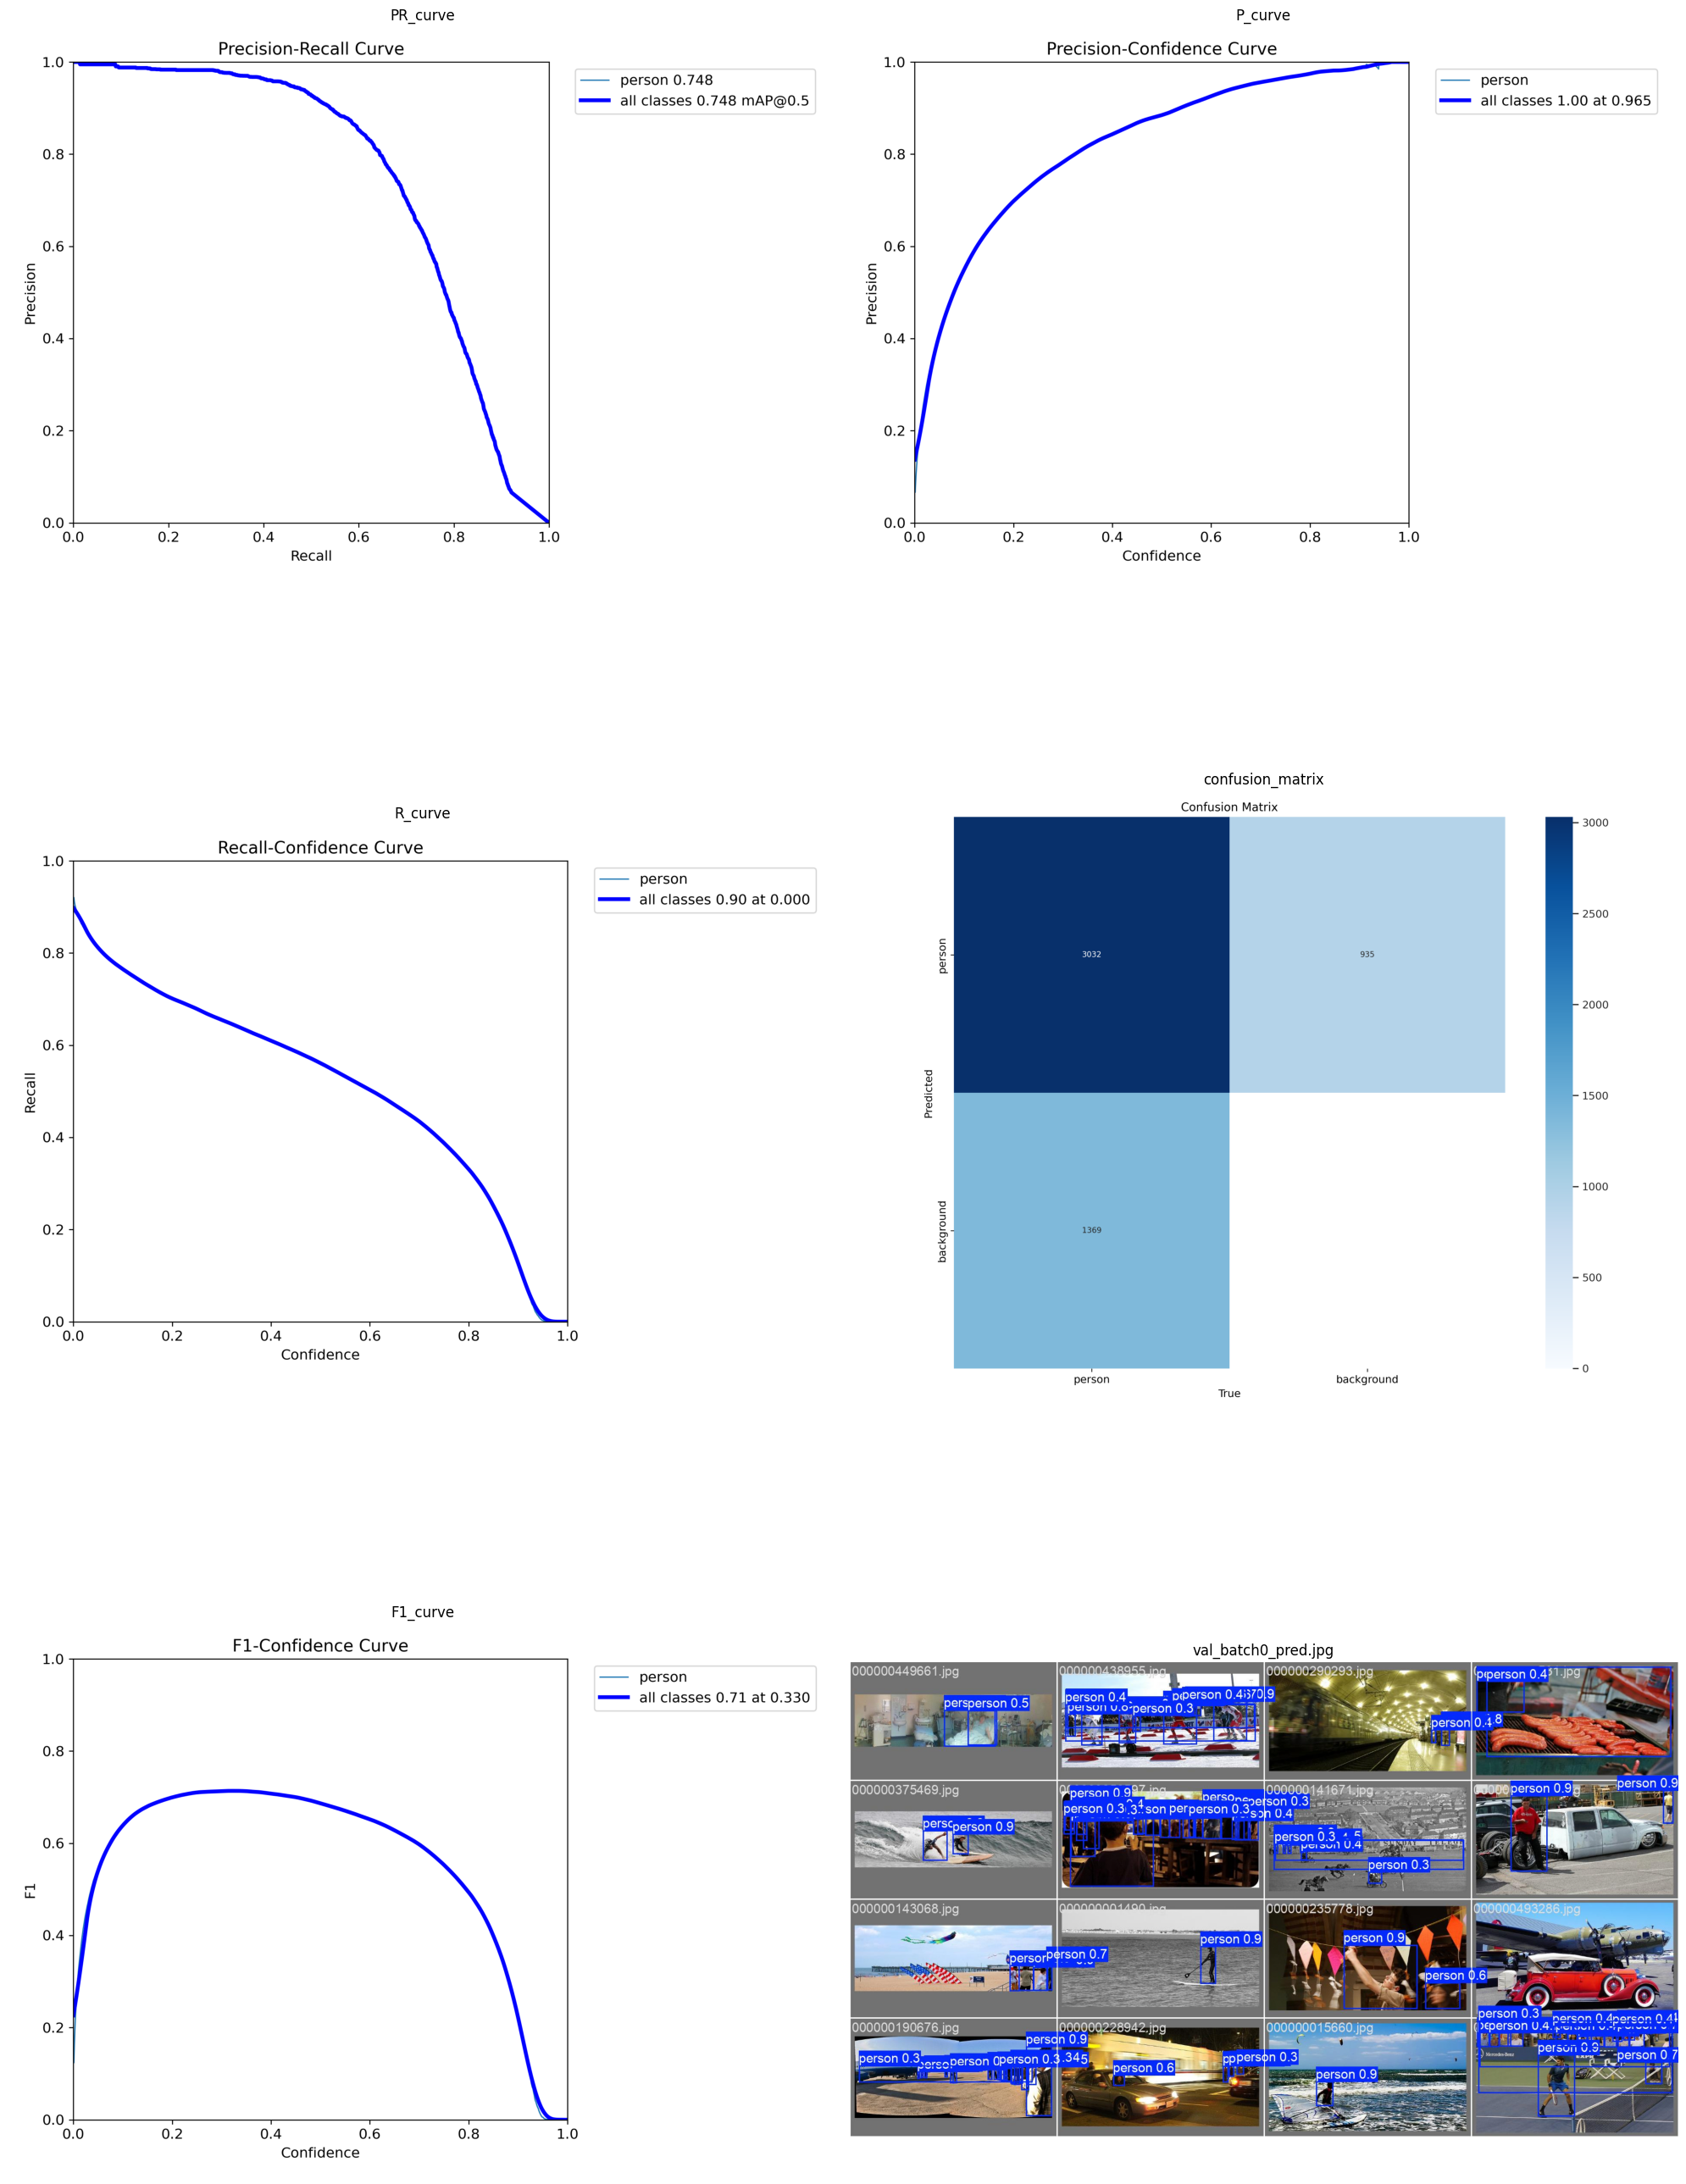

In [51]:
import matplotlib.pyplot as plt

path = "/kaggle/working/runs/detect/val"
eval = os.listdir(path)
idx = [0, 1, 3, 5, 8, 10]  #PR,P,R,CM,F1,pred sample
fig = plt.figure(figsize=(20, 30)) 
for i, j in enumerate(idx):
    img = cv2.imread(os.path.join(path,eval[j]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3, 2, i+1)
    plt.imshow(img)
    plt.axis('off') 
    plt.title(eval[j].replace(".png", ""))

plt.tight_layout()
plt.show()